# Filter Dasar dalam Pemrosesan Sinyal Digital

Sesi hands-on ini dirancang untuk memperkenalkan Anda pada filter dasar dalam pemrosesan sinyal digital (DSP) menggunakan Python dan Jupyter Notebook. Kita akan mengeksplorasi cara membuat dan menerapkan filter low-pass, high-pass, dan band-pass pada sinyal. Kita juga akan memvisualisasikan efek filter ini dalam domain waktu dan frekuensi.

## Import

Mari kita mulai dengan mengimpor library yang diperlukan. Kita akan menggunakan `numpy` untuk operasi numerik, `matplotlib` untuk membuat plot, dan `scipy.signal` untuk desain dan analisis filter.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Set up the notebook for better visualizations
plt.style.use('ggplot')
%matplotlib inline

## Memahami Filter Dasar

Filter adalah alat dalam DSP yang memungkinkan frekuensi tertentu untuk lewat sambil meredam frekuensi lainnya. Filter dasar yang paling umum adalah:

- Low-Pass Filter (LPF): Melewatkan frekuensi di bawah frekuensi batas tertentu dan meredam frekuensi di atasnya.
- High-Pass Filter (HPF): Melewatkan frekuensi di atas frekuensi batas tertentu dan meredam frekuensi di bawahnya.
- Band-Pass Filter (BPF): Melewatkan frekuensi dalam rentang tertentu dan meredam frekuensi di luar rentang tersebut.

### Low-Pass Filter (LPF)

Teori: Filter low-pass memungkinkan frekuensi di bawah batas tertentu untuk melewatinya dan meredam frekuensi yang lebih tinggi. Ini berguna dalam menghilangkan derau frekuensi tinggi dari sinyal.

#### Merancang Filter Low-Pass Sederhana

Kita akan membuat filter low-pass sederhana menggunakan filter Butterworth, yang dikenal memiliki respons frekuensi datar di pita frekuensi.

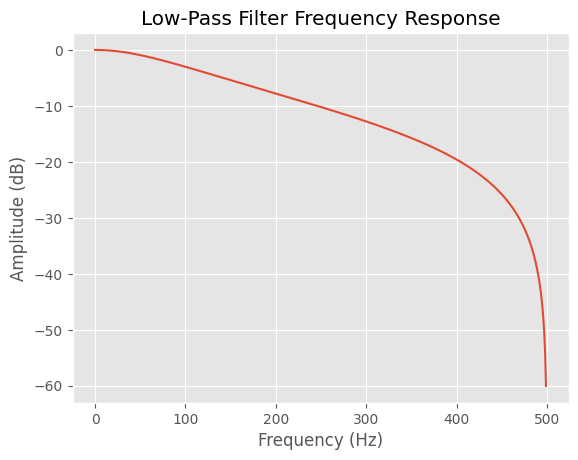

In [16]:
# Filter design parameters
sampling_rate = 1000  # Sampling rate in Hz
cutoff_frequency = 100  # Cutoff frequency in Hz
order = 1  # Filter order

# Design a Butterworth low-pass filter
b, a = signal.butter(order, cutoff_frequency, fs=sampling_rate, btype='low', analog=False)

# Frequency response of the filter
w, h = signal.freqz(b, a, fs=sampling_rate)

# Plot the frequency response
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Low-Pass Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.show()


#### Penjelasan:

- Fungsi `signal.butter` merancang filter Butterworth. Parameter order mengontrol kecuraman filter, dan `cutoff_frequency` menentukan frekuensi saat filter mulai meredam sinyal.
- Fungsi `signal.freqz` menghitung respons frekuensi filter, yang kami plot dalam desibel (dB) untuk memahami bagaimana filter memengaruhi frekuensi yang berbeda.

#### Menerapkan Filter Low-Pass pada Sinyal
Mari kita buat sinyal uji yang merupakan kombinasi dari dua gelombang sinusoidal, satu di dalam passband filter kita dan satu di luarnya. Kemudian kita akan menerapkan filter low-pass pada sinyal ini.

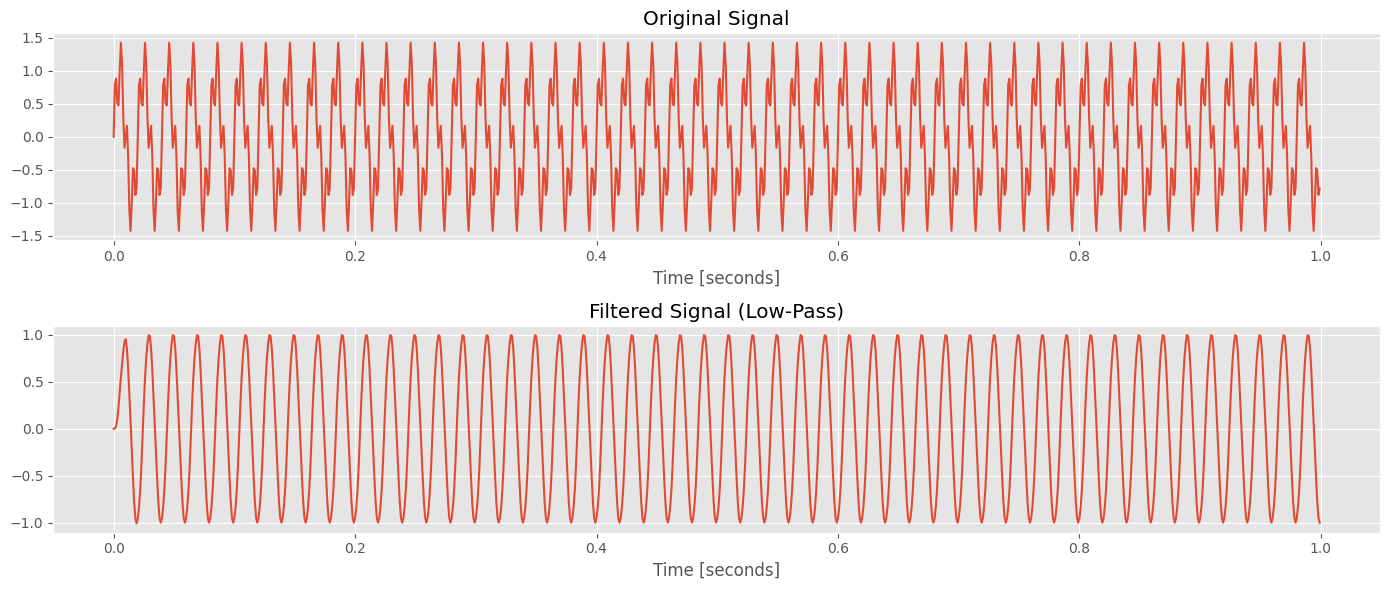

In [9]:
# Time vector
t = np.linspace(0, 1.0, sampling_rate, endpoint=False)

# Create a test signal: a sum of 50 Hz and 200 Hz sinusoidal waves
signal_original = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 200 * t)

# Apply the low-pass filter to the signal
signal_filtered = signal.lfilter(b, a, signal_original)

# Plot the original and filtered signals
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal_original)
plt.title('Original Signal')
plt.xlabel('Time [seconds]')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, signal_filtered)
plt.title('Filtered Signal (Low-Pass)')
plt.xlabel('Time [seconds]')
plt.grid(True)

plt.tight_layout()
plt.show()


#### Penjelasan:

- Kita menghasilkan sinyal yang merupakan penjumlahan dari dua gelombang sinus: satu pada 50 Hz (di dalam passband) dan satu pada 200 Hz (di luar passband).
- Kita kemudian menerapkan filter low-pass menggunakan signal.lfilter, yang memproses sinyal dengan koefisien filter b dan a.
- Plot menunjukkan bagaimana filter menghilangkan komponen frekuensi tinggi (200 Hz) sambil mempertahankan komponen frekuensi rendah (50 Hz).

### High-Pass Filter (HPF)

Teori: High Pass Filter memungkinkan frekuensi di atas batas tertentu untuk lewat dan meredam frekuensi yang lebih rendah. Filter ini berguna untuk menghilangkan komponen frekuensi rendah, seperti penyimpangan sinyal.

Merancang Filter HP Sederhana

Sekarang mari kita rancang filter lolos tinggi menggunakan pendekatan yang sama.

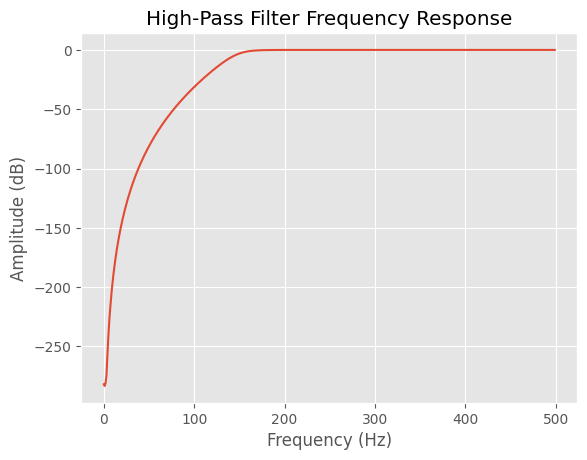

In [26]:
# High-pass filter design parameters
cutoff_frequency = 150  # Cutoff frequency in Hz
order = 8

# Design a Butterworth high-pass filter
b, a = signal.butter(order, cutoff_frequency, fs=sampling_rate, btype='high', analog=False)

# Frequency response of the filter
w, h = signal.freqz(b, a, fs=sampling_rate)

# Plot the frequency response
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('High-Pass Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.show()


Penjelasan:

Filter high-pass ini dirancang untuk meredam frekuensi di bawah 100 Hz. Plot respons frekuensi menunjukkan bahwa frekuensi di bawah batas akan diredam, sedangkan frekuensi di atasnya dibiarkan lewat.

Sekarang kita akan menerapkannya di sinyal

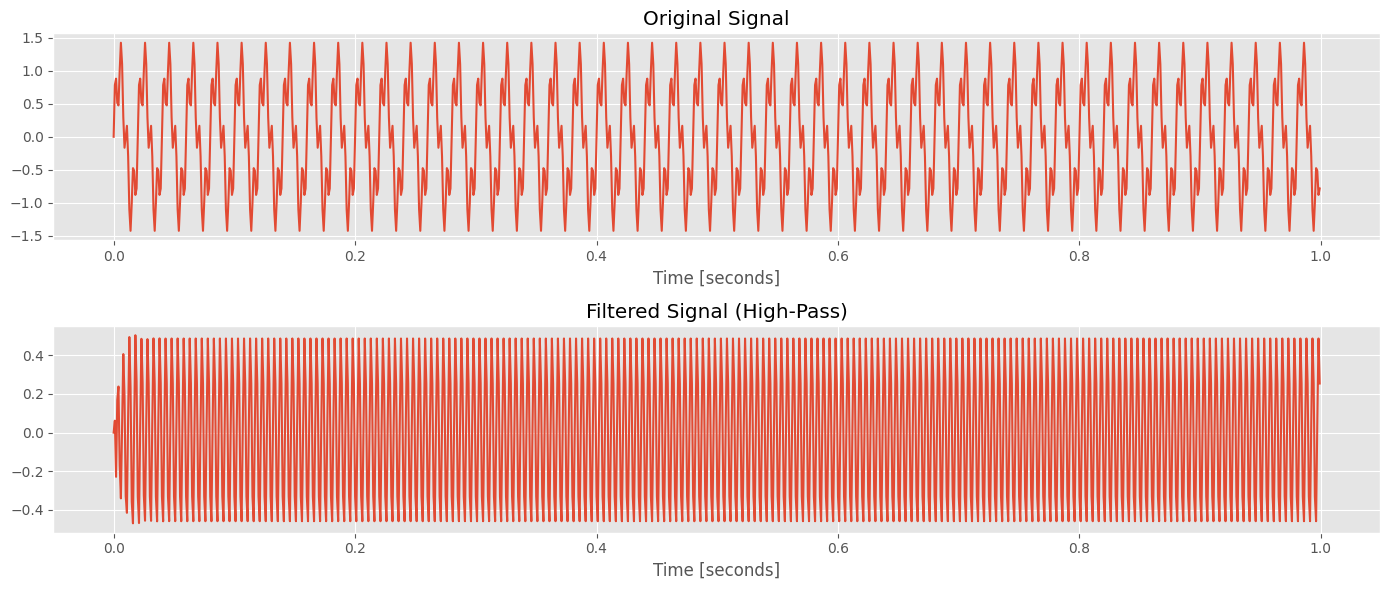

In [27]:
# Apply the high-pass filter to the signal
signal_filtered_hp = signal.lfilter(b, a, signal_original)

# Plot the original and filtered signals
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal_original)
plt.title('Original Signal')
plt.xlabel('Time [seconds]')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, signal_filtered_hp)
plt.title('Filtered Signal (High-Pass)')
plt.xlabel('Time [seconds]')
plt.grid(True)

plt.tight_layout()
plt.show()


---
## Tugas: `ho1`

#### Instruksi:

6. Terdapat parameter `order` pada saat melakukan filtering. Apa yang dimaksud dengan `order`? Apa yang terjadi ketika mengubah nilai `order`?

7. Lakukan eksperimen dengan merancang filter band-pass menggunakan `signal.butter`. Anda dapat menentukan dua frekuensi cut-off

### Ketentuan Penamaan File
```
nim_ho1.ipynb
```

### Pengumpulan
- Unggah `.ipynb` ke repositori anda.
- Paste link dari file ke google form pengumpulan tugas
- Export `.ipynb` menjadi `.pdf` dan unggah juga ke google form

Link yang di paste harus mirip dengan format berikut:
```
https://github.com/<username>/<kode_mk>/blob/master/<nim_ho1>.ipynb
```

- *Pastikan repo anda bersifat privat dan anda telah mengundang dosen pengampu ke repositori anda*
- Seluruh tugas untuk ho1 digabung dalam satu file notebook `.ipynb`
- Berikan penjelasan yang sedetail-detailnya untuk setiap bagian eksperimen yang anda lakukan